# Stock Prediction Using Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataSets/tesla.csv')

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,07-07-2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,08-07-2010,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,09-07-2010,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,12-07-2010,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,13-07-2010,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Change Date from object to its datatype
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2193 non-null   datetime64[ns]
 1   Open       2193 non-null   float64       
 2   High       2193 non-null   float64       
 3   Low        2193 non-null   float64       
 4   Close      2193 non-null   float64       
 5   Adj Close  2193 non-null   float64       
 6   Volume     2193 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 120.1 KB


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


In [ ]:
df.shape

(2193, 7)

In [ ]:
#Arrange the highest stock prices in a descending order
df.sort_values(by='High',ascending=False)[['High','Date']].head(10)
#df['High'].value_counts().head(10)

,High,Date
1818,389.609985,2017-09-18
2041,387.459991,2018-08-07
1759,386.989990,2017-06-23
1760,386.950012,2017-06-26
1758,385.000000,2017-06-22
1752,384.250000,2017-06-14
2042,382.640015,2018-08-08
1819,382.390015,2017-09-19
1817,380.000000,2017-09-15
2126,379.489990,2018-12-07


In [ ]:
#Arrange the stock prices with their lowest price starting with the lowest price
df.sort_values(by='Low',ascending=True)[['Low','Date']].head(10)

,Low,Date
5,14.980000,2010-07-07
6,15.570000,2010-07-08
4,15.830000,2010-07-06
7,16.549999,2010-07-09
9,16.900000,2010-07-13
8,17.000000,2010-07-12
31,17.389999,2010-08-12
0,17.540001,2010-06-29
32,17.660000,2010-08-13
10,17.760000,2010-07-14


In [ ]:
#Arrange the stock prices according to the final prices when the market closed in a descending order
df.sort_values(by='Close',ascending=False)[['Close','Date']].head(10)

,Close,Date
1818,385.000000,2017-09-18
1759,383.450012,2017-06-23
1758,382.609985,2017-06-22
1752,380.660004,2017-06-14
1817,379.809998,2017-09-15
2041,379.570007,2018-08-07
1816,377.640015,2017-09-14
1760,377.489990,2017-06-26
2130,376.790009,2018-12-13
1757,376.399994,2017-06-21


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#sort by the adj close of the stocks
df.sort_values(by='Adj Close',ascending=False)[['Adj Close','Date']].head(10)

,Adj Close,Date
1818,385.000000,2017-09-18
1759,383.450012,2017-06-23
1758,382.609985,2017-06-22
1752,380.660004,2017-06-14
1817,379.809998,2017-09-15
2041,379.570007,2018-08-07
1816,377.640015,2017-09-14
1760,377.489990,2017-06-26
2130,376.790009,2018-12-13
1757,376.399994,2017-06-21


In [ ]:
#Sort the stock prices according to the volume
df.sort_values(by='Volume',ascending=False)[['Volume','Date']].head(10)

,Volume,Date
723,37163900,2013-05-14
2078,33649700,2018-09-28
920,32681700,2014-02-25
766,32371900,2013-07-16
846,31071700,2013-11-06
2041,30875800,2018-08-07
720,28605000,2013-05-09
892,27607000,2014-01-14
2098,27425500,2018-10-26
783,27246800,2013-08-08


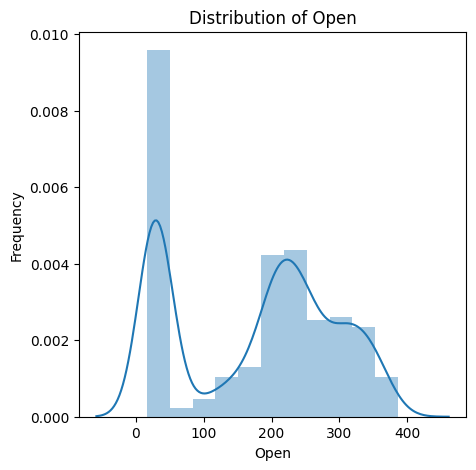

In [ ]:
#Data distribution of each column according to date
plt.figure(figsize=(5,5))
sns.distplot(df['Open'])
plt.title('Distribution of Open')
plt.xlabel('Open')
plt.ylabel('Frequency')
plt.show()


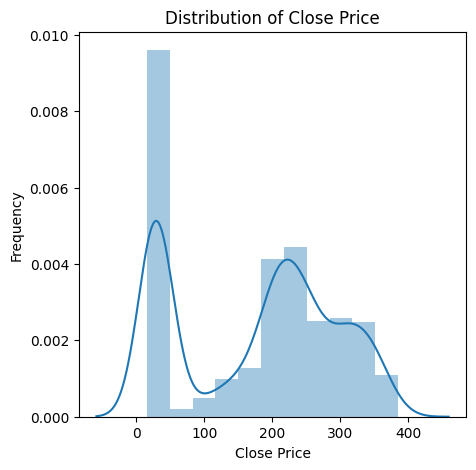

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['Close'])
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

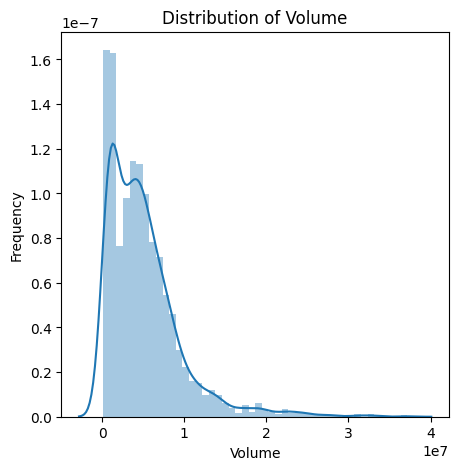

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['Volume'])
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

# Machine Learning Model Building

- XGBoost Algorithm
- Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [ ]:
#Drop irrelevant columns
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
#Define the x and y variable
df['Target']=df['Adj Close'].shift(-1)
df=df.dropna()
x=df[['High','Close','Low','Volume','Open']]
y=df['Target']


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Target
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,23.830000
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,21.959999
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,19.200001
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,16.110001
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,15.800000


In [ ]:
#Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regression

In [ ]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Prediction
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.997473414377121


# XGBoost Regressor

In [ ]:
#XGBoost REgressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Prediction
y_pred=xgb.predict(x_test)

In [ ]:
#Evaluation
print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.996530724750134


In [ ]:
#Save the model
import pickle
pickle.dump(xgb,open('xgb.pkl','wb'))

In [ ]:
#Load the model
model=pickle.load(open('xgb.pkl','rb'))